<a href="https://colab.research.google.com/github/itsroot22/apache-log-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:

file_name = "/content/log_file.log"
with open('/content/log_file.log', 'r') as file:
    file_content = file.read()
print(file_content)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
with open('/content/log_file.log', 'r') as log_file:
    log_entries = log_file.readlines()
chunk_size = 100
for i in range(0, len(log_entries), chunk_size):
    chunk = log_entries[i:i+chunk_size]
    print(''.join(chunk))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
!head -n 100 /content/log_file.log > small_log_file.log


In [45]:
!sed -n '1000,1100p' /content/log_file.log > small_log_file.log


In [17]:

# file is too large ,so take a portion out of it.
small_log_file_path = '/content/small_log_file.log'
with open(small_log_file_path, 'r') as small_log_file:
    small_log_content = small_log_file.read()
print(small_log_content)


84.54.149.165 - - [28/Feb/2022:14:33:27 +0200] "GET /wp-content/uploads/2021/07/totem-hookah-monolit-micra-blue-sky-1024x1024.jpeg HTTP/2.0" 200 60468 "https://nargile.bg/category/nargileta/page/3/?orderby=price-desc&min_price=70&max_price=450" "Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Mobile/15E148 Safari/604.1"
84.54.149.165 - - [28/Feb/2022:14:33:27 +0200] "GET /wp-content/uploads/2021/07/totem-hookah-monolit-micra-pantone-2021-1024x1024.jpeg HTTP/2.0" 200 61420 "https://nargile.bg/category/nargileta/page/3/?orderby=price-desc&min_price=70&max_price=450" "Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Mobile/15E148 Safari/604.1"
84.54.149.165 - - [28/Feb/2022:14:33:27 +0200] "GET /wp-content/uploads/2021/07/voodoo-smoke-down-gold-black-1024x1024.jpeg HTTP/2.0" 200 59602 "https://nargile.bg/category/nargileta/page/3/?orderby=price-desc&min_price=70&max

In [46]:
from collections import Counter
import re
log_file_path = '/content/small_log_file.log'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
log_entry_counts = Counter(log_entries)

#  the top 10 log entries with the highest hit counts
top_10_hits = log_entry_counts.most_common(10)
for entry, count in top_10_hits:
    print(f"Log Entry: {entry.strip()}")
    print(f"Hit Count: {count}")
    print("\n")


Log Entry: 84.54.149.165 - - [28/Feb/2022:14:33:27 +0200] "GET /wp-content/uploads/2021/07/totem-hookah-monolit-micra-blue-sky-1024x1024.jpeg HTTP/2.0" 200 60468 "https://nargile.bg/category/nargileta/page/3/?orderby=price-desc&min_price=70&max_price=450" "Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Mobile/15E148 Safari/604.1"
Hit Count: 1


Log Entry: 84.54.149.165 - - [28/Feb/2022:14:33:27 +0200] "GET /wp-content/uploads/2021/07/totem-hookah-monolit-micra-pantone-2021-1024x1024.jpeg HTTP/2.0" 200 61420 "https://nargile.bg/category/nargileta/page/3/?orderby=price-desc&min_price=70&max_price=450" "Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Mobile/15E148 Safari/604.1"
Hit Count: 1


Log Entry: 84.54.149.165 - - [28/Feb/2022:14:33:27 +0200] "GET /wp-content/uploads/2021/07/voodoo-smoke-down-gold-black-1024x1024.jpeg HTTP/2.0" 200 59602 "https://nargile.bg

In [49]:

#2.Count total number of http codes

log_file_path = '/content/log_file.log'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
http_status_code_counts = {}
for log_entry in log_entries:
    words = log_entry.split()
    for word in words:
        if word.isdigit() and len(word) == 3:
            status_code = int(word)
            if status_code in http_status_code_counts:
                http_status_code_counts[status_code] += 1
            else:
                http_status_code_counts[status_code] = 1
for code, count in http_status_code_counts.items():
    print(f"HTTP Status Code {code}: {count} occurrences")


HTTP Status Code 200: 526152 occurrences
HTTP Status Code 992: 2383 occurrences
HTTP Status Code 308: 1158 occurrences
HTTP Status Code 793: 1157 occurrences
HTTP Status Code 406: 673 occurrences
HTTP Status Code 249: 674 occurrences
HTTP Status Code 404: 13896 occurrences
HTTP Status Code 196: 134 occurrences
HTTP Status Code 779: 661 occurrences
HTTP Status Code 565: 1142 occurrences
HTTP Status Code 497: 1076 occurrences
HTTP Status Code 848: 1095 occurrences
HTTP Status Code 506: 1078 occurrences
HTTP Status Code 583: 1077 occurrences
HTTP Status Code 485: 1154 occurrences
HTTP Status Code 872: 1158 occurrences
HTTP Status Code 458: 1153 occurrences
HTTP Status Code 871: 1152 occurrences
HTTP Status Code 348: 1143 occurrences
HTTP Status Code 986: 736 occurrences
HTTP Status Code 911: 740 occurrences
HTTP Status Code 567: 737 occurrences
HTTP Status Code 362: 1140 occurrences
HTTP Status Code 922: 1141 occurrences
HTTP Status Code 524: 1138 occurrences
HTTP Status Code 538: 1149 oc

In [50]:
#3.Total hits per URL ,thus, find the URL with maximum hits
 url_counter = Counter()
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
url_pattern = r'"(GET|POST) ([^"]+) HTTP'
for log_entry in log_entries:
    url_match = re.search(url_pattern, log_entry)
    if url_match:
        url = url_match.group(2)
        url_counter[url] += 1

most_common_url, max_hits = url_counter.most_common(1)[0]
for url, hits in url_counter.items():
    print(f"URL: {url}")
    print(f"Total Hits: {hits}")
    print("\n")
print(f"The URL with the maximum hits is:")
print(f"URL: {most_common_url}")
print(f"Total Hits: {max_hits}")


URL: /wp-content/uploads/2021/07/totem-hookah-monolit-micra-blue-sky-1024x1024.jpeg
Total Hits: 1


URL: /wp-content/uploads/2021/07/totem-hookah-monolit-micra-pantone-2021-1024x1024.jpeg
Total Hits: 1


URL: /wp-content/uploads/2021/07/voodoo-smoke-down-gold-black-1024x1024.jpeg
Total Hits: 1


URL: /product/dschinni-shisha-stealth-bomber-classic-venom-set/
Total Hits: 1


URL: /?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999
Total Hits: 5


URL: /wp-content/uploads/2021/05/%D0%BD%D0%B0%D1%80%D0%B3%D0%B8%D0%BB%D0%B5-alpha-hookah-model-x-breeze-1024x1024.jpg
Total Hits: 1


URL: /wp-content/uploads/2021/05/%D0%BD%D0%B0%D1%80%D0%B3%D0%B8%D0%BB%D0%B5-alpha-hookah-model-x-bronze-1024x1024.jpg
Total Hits: 1


URL: /wp-content/uploads/2021/05/%D0%BD%D0%B0%D1%80%D0%B3%D0%B8%D0%BB%D0%B5-alpha-hookah-model-x-breeze-600x600.jpg
Total Hits: 1


URL: /wp-content/uploads/2021/05/%D0%BD%D0%B0%D1%80%D0%B3%D0%B8%D0%BB%D0%B5-alpha-hookah-model-x-bronze-600x600.jpg
Total Hits: 1


URL:

In [51]:
#4.Total hits per platform(android, IOS)
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
platform_hits = {
    'Android': 0,
    'iOS': 0,
}
for log_entry in log_entries:

    if 'Android' in log_entry:
        platform_hits['Android'] += 1
    elif 'iOS' in log_entry:
        platform_hits['iOS'] += 1
for platform, hits in platform_hits.items():
    print(f"Platform: {platform}, Total Hits: {hits}")


Platform: Android, Total Hits: 176205
Platform: iOS, Total Hits: 44408


In [70]:
#5.Total hits per browser

from collections import defaultdict
import re

log_file_path = '/content/log_file.log'
browser_hits = defaultdict(int)
user_agent_pattern = r'"([^"]+)"$'
with open(log_file_path, 'r') as log_file:
    for log_entry in log_file:
        user_agent_match = re.search(user_agent_pattern, log_entry)
        if user_agent_match:
            user_agent = user_agent_match.group(1)

            browser_hits[user_agent] += 1
for browser, hits in browser_hits.items():
    print(f"Browser: {browser}")
    print(f"Total Hits: {hits}")
    print("\n")


Streaming output truncated to the last 5000 lines.
Browser: Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 musical_ly_23.2.0 JsSdk/2.0 NetType/WIFI Channel/App Store ByteLocale/en Region/BG ByteFullLocale/en isDarkMode/0 WKWebView/1 BytedanceWebview/d8a21c6
Total Hits: 781


Browser: Mozilla/5.0 (iPhone; CPU iPhone OS 15_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 Instagram 223.0.0.11.104 (iPhone12,1; iOS 15_3; en_BG; en-BG; scale=2.00; 828x1792; 352006504) NW/3
Total Hits: 1


Browser: Mozilla/5.0 (iPhone; CPU iPhone OS 15_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 Instagram 223.0.0.11.104 (iPhone12,1; iOS 15_3; en_BG; en-BG; scale=2.00; 828x1792; 352006504)
Total Hits: 5


Browser: Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:28.0) Gecko/20100101 Firefox/28.0
Total Hits: 3


Browser: Mozilla/5.0 (iPhone; CPU iPhone OS 15_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, l

In [71]:

#6.Traffic distribution on each site hourly basis (size of data/total number of hours)

site_traffic = defaultdict(int)
hourly_counts = defaultdict(int)
log_entry_pattern = r'\[([\w:/]+\s[+\-]\d{4})\]\s+"(?:GET|POST)\s([^"]+)\sHTTP'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
for log_entry in log_entries:
    match = re.search(log_entry_pattern, log_entry)
    if match:
        timestamp = match.group(1)
        url = match.group(2)
        hour = timestamp.split(':')[1]
        site_traffic[(url, hour)] += 1
        hourly_counts[hour] += 1
total_hours = len(hourly_counts)
for (url, hour), hits in site_traffic.items():
    traffic_per_hour = hits / hourly_counts[hour]
    print(f"Site: {url}")
    print(f"Hour: {hour}")
    print(f"Traffic per Hour: {traffic_per_hour}")
    print("\n")


Streaming output truncated to the last 5000 lines.
Site: /product/mason-shishaware-helyx-2-fanel-chashka-za-nargile/
Hour: 13
Traffic per Hour: 0.00017031132910961237


Site: /wp-content/uploads/2021/05/vyro-carbon-%D0%BC%D1%83%D0%BD%D0%B4%D1%89%D1%83%D0%BA-%D1%81-%D0%B2%D0%BA%D0%BB-vyro-%D1%81%D0%B8%D0%BB%D0%B8%D0%BA%D0%BE%D0%BD%D0%BE%D0%B2-%D0%BC%D0%B0%D1%80%D0%BA%D1%83%D1%87-red-1024x1024.png
Hour: 13
Traffic per Hour: 3.406226582192247e-05


Site: /wp-content/uploads/2021/08/dschinni-candyhose-silver-%D1%81%D0%B8%D0%BB%D0%B8%D0%BA%D0%BE%D0%BD%D0%BE%D0%B2-%D0%BC%D0%B0%D1%80%D0%BA%D1%83%D1%87-1024x1024.jpeg
Hour: 13
Traffic per Hour: 6.812453164384494e-05


Site: /wp-content/uploads/2021/06/steamulation-carbon-mouthpiece-blue-black-1024x1024.jpg
Hour: 13
Traffic per Hour: 3.406226582192247e-05


Site: /wp-content/uploads/2021/06/steamulation-carbon-mouthpiece-gold-black-1024x1024.jpg
Hour: 13
Traffic per Hour: 3.406226582192247e-05


Site: /wp-content/uploads/2021/05/Soft-Touch-Silic

In [72]:
#.Total number of hits per hour and display in descending order of their count
hourly_hits = defaultdict(int)
log_entry_pattern = r'\[([\w:/]+\s[+\-]\d{4})\]'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
for log_entry in log_entries:
    match = re.search(log_entry_pattern, log_entry)
    if match:
        timestamp = match.group(1)
        hour = timestamp.split(':')[1]
        hourly_hits[hour] += 1
sorted_hourly_hits = dict(sorted(hourly_hits.items(), key=lambda x: x[1], reverse=True))
for hour, hits in sorted_hourly_hits.items():
    print(f"Hour: {hour}")
    print(f"Total Hits: {hits}")
    print("\n")


Hour: 16
Total Hits: 50458


Hour: 17
Total Hits: 42805


Hour: 15
Total Hits: 42342


Hour: 20
Total Hits: 37316


Hour: 12
Total Hits: 34937


Hour: 23
Total Hits: 34393


Hour: 14
Total Hits: 33943


Hour: 19
Total Hits: 33374


Hour: 18
Total Hits: 32328


Hour: 21
Total Hits: 31422


Hour: 22
Total Hits: 29910


Hour: 13
Total Hits: 29363


Hour: 00
Total Hits: 22051


Hour: 11
Total Hits: 20691


Hour: 09
Total Hits: 18692


Hour: 10
Total Hits: 15764


Hour: 01
Total Hits: 15165


Hour: 08
Total Hits: 14142


Hour: 02
Total Hits: 10233


Hour: 03
Total Hits: 5505


Hour: 07
Total Hits: 5261


Hour: 06
Total Hits: 4181


Hour: 04
Total Hits: 3808


Hour: 05
Total Hits: 2355




In [73]:

# Plot graphs

!pip install seaborn matplotlib


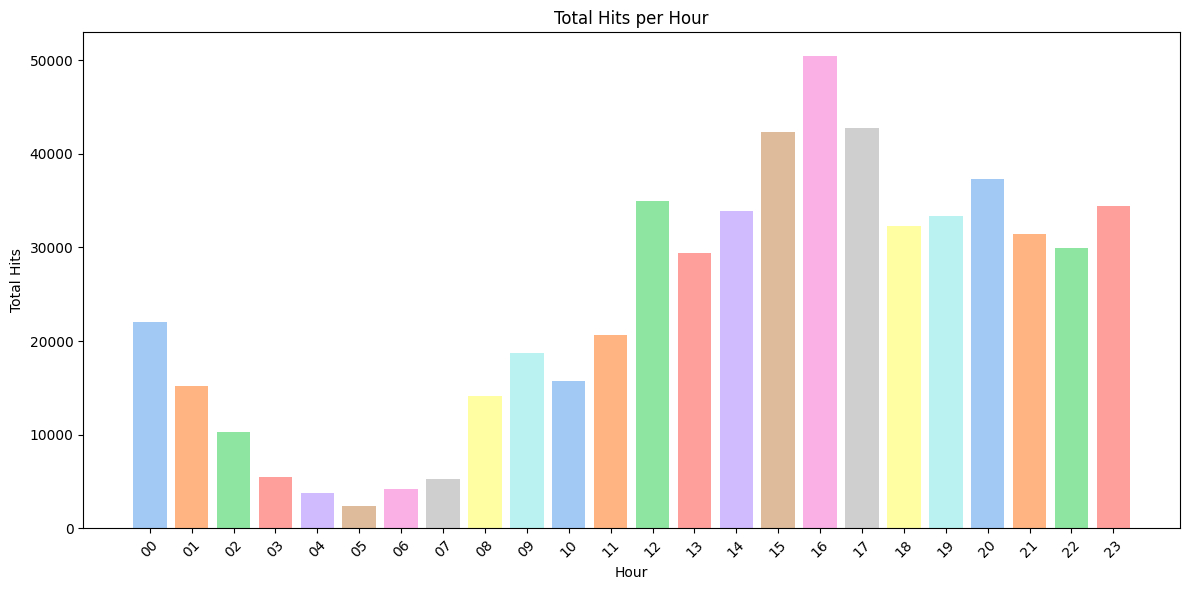

In [80]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

hourly_hits = defaultdict(int)
log_entry_pattern = r'\[([\w:/]+\s[+\-]\d{4})\]'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
for log_entry in log_entries:
    match = re.search(log_entry_pattern, log_entry)
    if match:
        timestamp = match.group(1)
        hour = timestamp.split(':')[1]
        hourly_hits[hour] += 1
df = pd.DataFrame(list(hourly_hits.items()), columns=['Hour', 'Total Hits'])
df = df.sort_values(by='Hour')
colors = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
plt.bar(df['Hour'], df['Total Hits'], color=colors)
plt.title('Total Hits per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


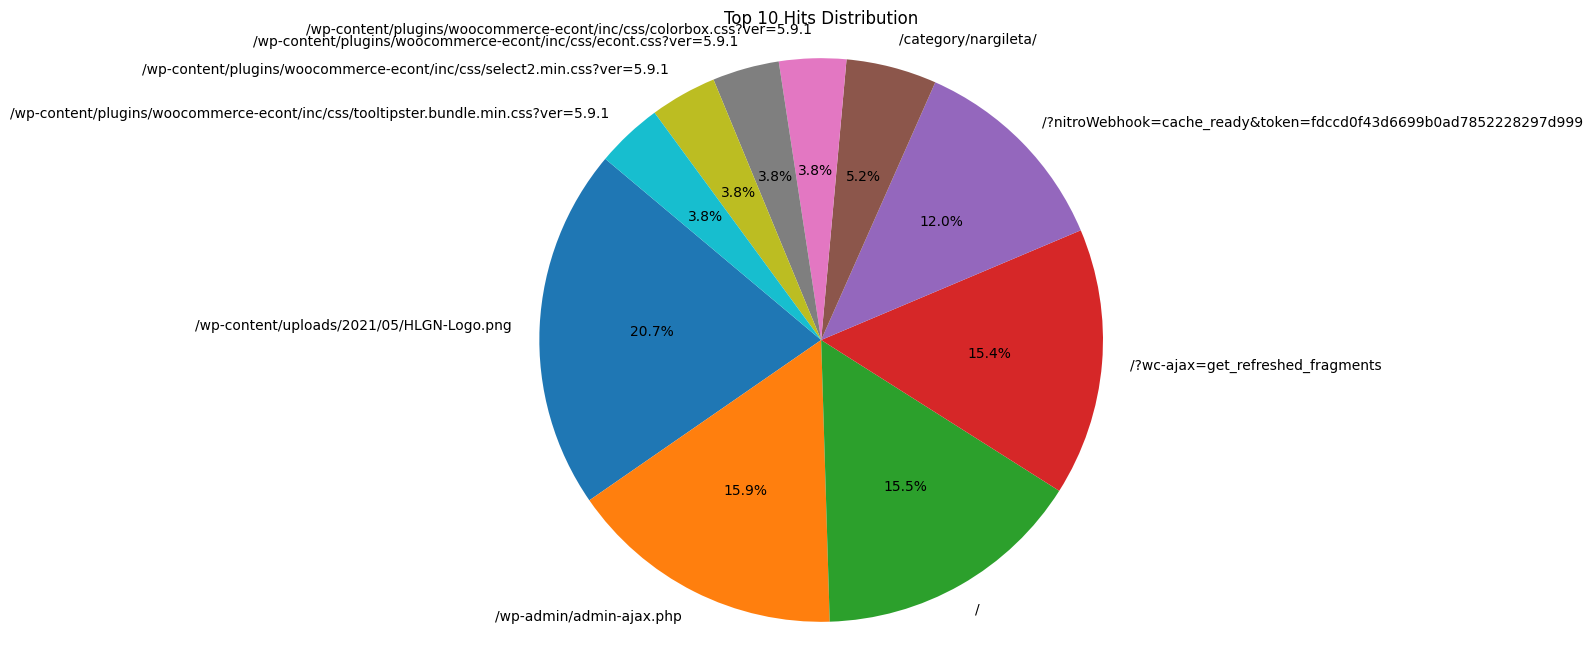

In [81]:

url_hits = defaultdict(int)
log_entry_pattern = r'"(?:GET|POST)\s([^"]+)\sHTTP'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
for log_entry in log_entries:
    match = re.search(log_entry_pattern, log_entry)
    if match:
        url = match.group(1)
        url_hits[url] += 1
top_10_hits = dict(sorted(url_hits.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure(figsize=(8, 8))
plt.pie(top_10_hits.values(), labels=top_10_hits.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Hits Distribution')
plt.axis('equal')
plt.show()


<ipython-input-85-a434b280cb01>:42: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Total Hits', y='URL', data=top_urls, jitter=True, orient='h', palette='Set2', size=10)  # Adjust the size parameter


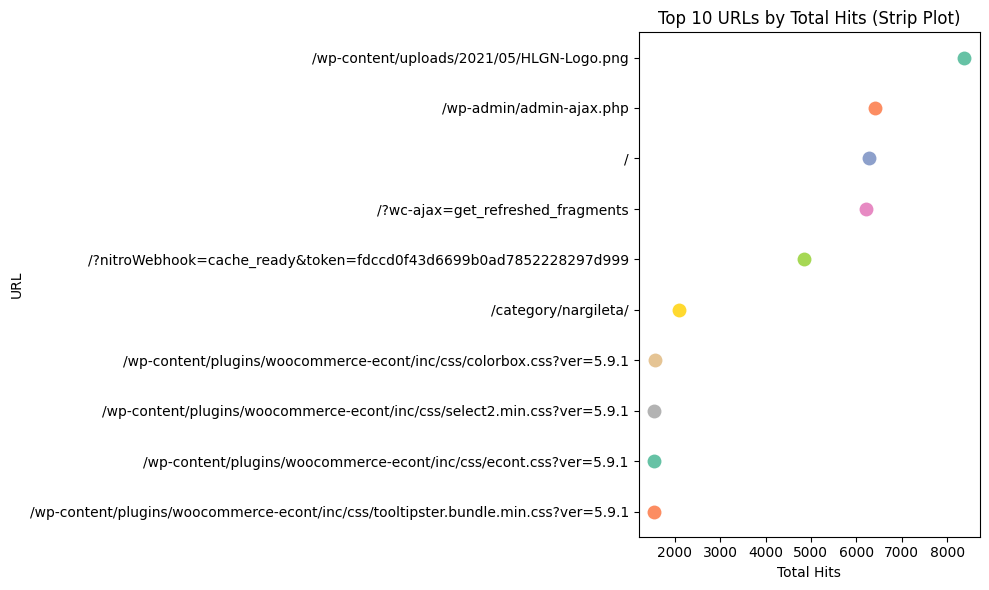

In [85]:

log_entry_pattern = r'"(?:GET|POST)\s([^"]+)\sHTTP'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
for log_entry in log_entries:
    match = re.search(log_entry_pattern, log_entry)
    if match:
        url = match.group(1)
        url_hits[url] += 1
df = pd.DataFrame(list(url_hits.items()), columns=['URL', 'Total Hits'])
df = df.sort_values(by='Total Hits', ascending=False)
top_n = 10
top_urls = df.head(top_n)
plt.figure(figsize=(10, 6))
sns.stripplot(x='Total Hits', y='URL', data=top_urls, jitter=True, orient='h', palette='Set2', size=10)  # Adjust the size parameter
plt.title(f'Top {top_n} URLs by Total Hits (Strip Plot)')
plt.xlabel('Total Hits')
plt.ylabel('URL')
plt.tight_layout()
plt.show()
